#🛠️Preparação dos dados

##Importando os dados e removendo colunas irrelevantes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/dados_Telecom_tratados.csv')
df.head()

,contrato,fatura_on_line,metodo_pagamento,gasto_mensal,gasto_total,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,...,multiplas_linhas,genero,idoso_maior_65,possui_parceira,dependentes,tempo_contrato,id_cliente,evadido,compras_diarias,evadido_numerico
0,one year,1,mailed check,65.6,593.30,dsl,0,1,0,1,...,0,female,0,1,1,9,0002-orfbo,0.0,2.186667,0
1,month-to-month,0,mailed check,59.9,542.40,dsl,0,0,0,0,...,1,male,0,0,0,9,0003-mknfe,0.0,1.996667,0
2,month-to-month,1,electronic check,73.9,280.85,fiber optic,0,0,1,0,...,0,male,0,0,0,4,0004-tlhlj,1.0,2.463333,1
3,month-to-month,1,electronic check,98.0,1237.85,fiber optic,0,1,1,0,...,0,male,1,1,0,13,0011-igkff,1.0,3.266667,1
4,month-to-month,1,mailed check,83.9,267.40,fiber optic,0,0,0,1,...,0,female,1,1,0,3,0013-exchz,1.0,2.796667,1


In [3]:
df.drop(['id_cliente','evadido'], axis=1, inplace=True)
df.head()

,contrato,fatura_on_line,metodo_pagamento,gasto_mensal,gasto_total,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,...,streaming_filmes,servico_telefone,multiplas_linhas,genero,idoso_maior_65,possui_parceira,dependentes,tempo_contrato,compras_diarias,evadido_numerico
0,one year,1,mailed check,65.6,593.30,dsl,0,1,0,1,...,no,1,0,female,0,1,1,9,2.186667,0
1,month-to-month,0,mailed check,59.9,542.40,dsl,0,0,0,0,...,yes,1,1,male,0,0,0,9,1.996667,0
2,month-to-month,1,electronic check,73.9,280.85,fiber optic,0,0,1,0,...,no,1,0,male,0,0,0,4,2.463333,1
3,month-to-month,1,electronic check,98.0,1237.85,fiber optic,0,1,1,0,...,yes,1,0,male,1,1,0,13,3.266667,1
4,month-to-month,1,mailed check,83.9,267.40,fiber optic,0,0,0,1,...,no,1,0,female,1,1,0,3,2.796667,1


##Encoding

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
colunas = df.columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   contrato              7267 non-null   object 
 1   fatura_on_line        7267 non-null   int64  
 2   metodo_pagamento      7267 non-null   object 
 3   gasto_mensal          7267 non-null   float64
 4   gasto_total           7267 non-null   float64
 5   servico_internet      7267 non-null   object 
 6   seguranca_online      7267 non-null   int64  
 7   backup_online         7267 non-null   int64  
 8   protecao_dispositivo  7267 non-null   int64  
 9   suporte_tecnico       7267 non-null   int64  
 10  tv_cabo               7267 non-null   object 
 11  streaming_filmes      7267 non-null   object 
 12  servico_telefone      7267 non-null   int64  
 13  multiplas_linhas      7267 non-null   int64  
 14  genero                7267 non-null   object 
 15  idoso_maior_65       

In [7]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                   ['contrato','metodo_pagamento','servico_internet','tv_cabo','streaming_filmes','genero']
                                   ),
                                  remainder='passthrough',
                                  sparse_threshold=0)

In [8]:
df = one_hot.fit_transform(df)

In [9]:
df.shape

(7267, 32)

In [10]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__contrato_month-to-month',
       'onehotencoder__contrato_one year',
       'onehotencoder__contrato_two year',
       'onehotencoder__metodo_pagamento_bank transfer (automatic)',
       'onehotencoder__metodo_pagamento_credit card (automatic)',
       'onehotencoder__metodo_pagamento_electronic check',
       'onehotencoder__metodo_pagamento_mailed check',
       'onehotencoder__servico_internet_dsl',
       'onehotencoder__servico_internet_fiber optic',
       'onehotencoder__servico_internet_no', 'onehotencoder__tv_cabo_no',
       'onehotencoder__tv_cabo_no internet service',
       'onehotencoder__tv_cabo_yes', 'onehotencoder__streaming_filmes_no',
       'onehotencoder__streaming_filmes_no internet service',
       'onehotencoder__streaming_filmes_yes',
       'onehotencoder__genero_male', 'remainder__fatura_on_line',
       'remainder__gasto_mensal', 'remainder__gasto_total',
       'remainder__seguranca_online', 'remainder__backup_online',
       'remaind

In [11]:
pd.DataFrame(df, columns=one_hot.get_feature_names_out(colunas)).head()

,onehotencoder__contrato_month-to-month,onehotencoder__contrato_one year,onehotencoder__contrato_two year,onehotencoder__metodo_pagamento_bank transfer (automatic),onehotencoder__metodo_pagamento_credit card (automatic),onehotencoder__metodo_pagamento_electronic check,onehotencoder__metodo_pagamento_mailed check,onehotencoder__servico_internet_dsl,onehotencoder__servico_internet_fiber optic,onehotencoder__servico_internet_no,...,remainder__protecao_dispositivo,remainder__suporte_tecnico,remainder__servico_telefone,remainder__multiplas_linhas,remainder__idoso_maior_65,remainder__possui_parceira,remainder__dependentes,remainder__tempo_contrato,remainder__compras_diarias,remainder__evadido_numerico
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9.0,2.186667,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,1.996667,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.463333,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,13.0,3.266667,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,2.796667,1.0


In [12]:
nome_colunas = ['contrato_mes_a_mes','contrato_um_ano','contrato_dois_anos','pag_transf_auto','pag_credito_auto','pag_cheque_eletronico',
                'pag_cheque_correios','dsl','fibra_otica','sem_serv_internet','sem_tv_a_cabo','tv_a_cabo_sem_internet','com_tv_a_cabo',
                'sem_streaming_filmes','streaming_filmes_sem internet','com_streaming_filmes','genero_homem','fatura_online','gasto_mensal',
                'gasto_total','seguranca_online','backup_online','protecao_dispositivo','suporte_tecnico','servico_telefone','multiplas_linhas',
                'maior_65','possui_parceira','dependentes','tempo_contrato','compras_diarias','evadido']

In [13]:
len(nome_colunas)

32

In [14]:
df.shape

(7267, 32)

In [15]:
df = pd.DataFrame(df, columns=nome_colunas)

In [16]:
df.head()

,contrato_mes_a_mes,contrato_um_ano,contrato_dois_anos,pag_transf_auto,pag_credito_auto,pag_cheque_eletronico,pag_cheque_correios,dsl,fibra_otica,sem_serv_internet,...,protecao_dispositivo,suporte_tecnico,servico_telefone,multiplas_linhas,maior_65,possui_parceira,dependentes,tempo_contrato,compras_diarias,evadido
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9.0,2.186667,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,1.996667,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.463333,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,13.0,3.266667,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,2.796667,1.0


##Verificação da Proporção de Evasão

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_filtrado = df[df['evadido'].isin([0, 1])]

# Mapeando rótulos
#mapa = {0: 'Não evadido', 1: 'Evadido'}
#df_filtrado['evadido'] = df_filtrado['evadido'].map(mapa)

# Calcular proporção em porcentagem
proporcao = df['evadido'].value_counts(normalize=True) * 100
print(proporcao)

# Criar gráfico de pizza
def grafico_pizza(proporcao):
  plt.figure(figsize=(5, 5))
  plt.pie(
      proporcao,
      labels=['Não evadido','Evadido', 'Desconhecido'],
      autopct='%.1f%%',
      startangle=90
  )
  plt.title('Proporção de Evadidos')
  plt.show();

evadido
0.0    71.198569
1.0    25.719004
2.0     3.082427
Name: proportion, dtype: float64


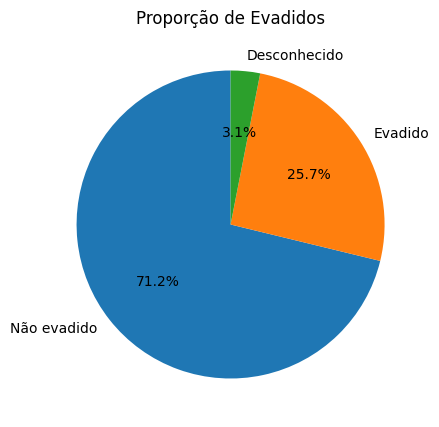

In [19]:
grafico_pizza(proporcao)

In [20]:
df_filtrado.head()

,contrato_mes_a_mes,contrato_um_ano,contrato_dois_anos,pag_transf_auto,pag_credito_auto,pag_cheque_eletronico,pag_cheque_correios,dsl,fibra_otica,sem_serv_internet,...,protecao_dispositivo,suporte_tecnico,servico_telefone,multiplas_linhas,maior_65,possui_parceira,dependentes,tempo_contrato,compras_diarias,evadido
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9.0,2.186667,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,1.996667,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.463333,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,13.0,3.266667,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,2.796667,1.0


##Balanceamento de dados

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
x = df_filtrado.drop('evadido', axis=1)
y = df_filtrado['evadido']

In [23]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [24]:
y_balanceado.value_counts(normalize=True)

,proportion
evadido,
0.0,0.5
1.0,0.5


In [25]:
x_balanceado

,contrato_mes_a_mes,contrato_um_ano,contrato_dois_anos,pag_transf_auto,pag_credito_auto,pag_cheque_eletronico,pag_cheque_correios,dsl,fibra_otica,sem_serv_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,servico_telefone,multiplas_linhas,maior_65,possui_parceira,dependentes,tempo_contrato,compras_diarias
0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.000000,1.0,1.0,0.000000,0.000000,1.000000,1.000000,9.000000,2.186667
1,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,9.000000,1.996667
2,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,4.000000,2.463333
3,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,...,1.0,1.000000,0.0,1.0,0.000000,1.000000,1.000000,0.000000,13.000000,3.266667
4,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.000000,1.0,1.0,0.000000,1.000000,1.000000,0.000000,3.000000,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.311668,0.688332,0.0,0.000000,0.688332,0.311668,0.0,0.0,1.0,0.0,...,1.0,0.311668,0.0,1.0,1.000000,0.000000,1.000000,0.000000,54.753326,3.392681
10344,1.000000,0.000000,0.0,0.177423,0.822577,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.000000,0.0,1.0,1.000000,0.000000,0.177423,0.177423,29.532269,3.242015
10345,0.832071,0.167929,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.167929,0.0,1.0,0.832071,0.832071,1.000000,0.167929,33.000000,3.146082
10346,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.312626,0.0,1.0,0.687374,1.000000,0.000000,0.000000,8.687374,2.918063


##Normalização dos dados

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
normalizacao = MinMaxScaler()
x_normalizado = normalizacao.fit_transform(x_balanceado)

In [28]:
nomes_colunas = ['contrato_mes_a_mes','contrato_um_ano','contrato_dois_anos','pag_transf_auto','pag_credito_auto','pag_cheque_eletronico',
                'pag_cheque_correios','dsl','fibra_otica','sem_serv_internet','sem_tv_a_cabo','tv_a_cabo_sem_internet','com_tv_a_cabo',
                'sem_streaming_filmes','streaming_filmes_sem internet','com_streaming_filmes','genero_homem','fatura_online','gasto_mensal',
                'gasto_total','seguranca_online','backup_online','protecao_dispositivo','suporte_tecnico','servico_telefone','multiplas_linhas',
                'maior_65','possui_parceira','dependentes','tempo_contrato','compras_diarias']

In [29]:
x_normalizado = pd.DataFrame(x_normalizado, columns=nomes_colunas)

#🎯 Correlação e Seleção de Variáveis

##Análise de Correlação

In [30]:
correlation_matrix = df_filtrado.corr()
display(correlation_matrix['evadido'])

,evadido
contrato_mes_a_mes,0.405103
contrato_um_ano,-0.177820
contrato_dois_anos,-0.302253
pag_transf_auto,-0.117937
pag_credito_auto,-0.134302
pag_cheque_eletronico,0.301919
pag_cheque_correios,-0.091683
dsl,-0.124214
fibra_otica,0.308020
sem_serv_internet,-0.227890


##Análises Direcionadas

In [31]:
def analise_correlacao(coluna):
  correlation_matrix.plot(kind='scatter', x=coluna, y='evadido', s=32, alpha=.8)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return plt

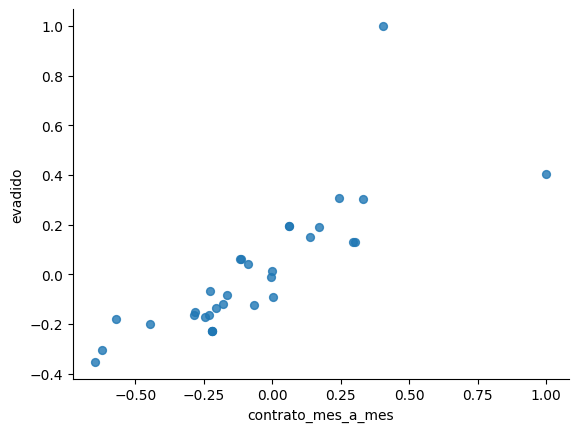

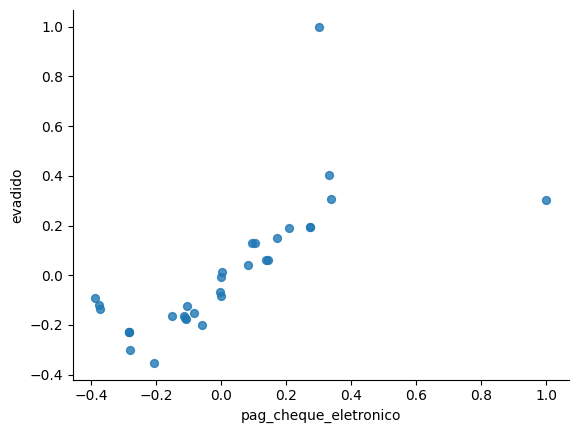

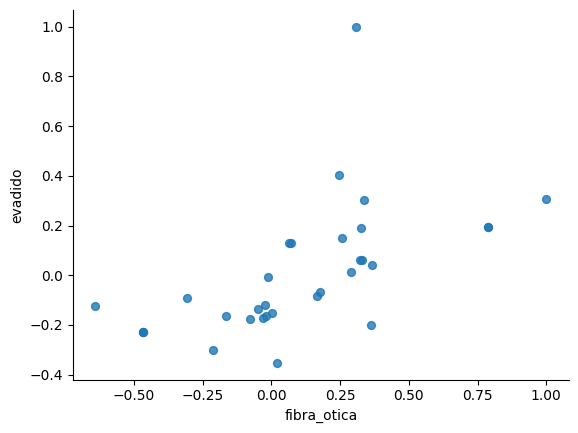

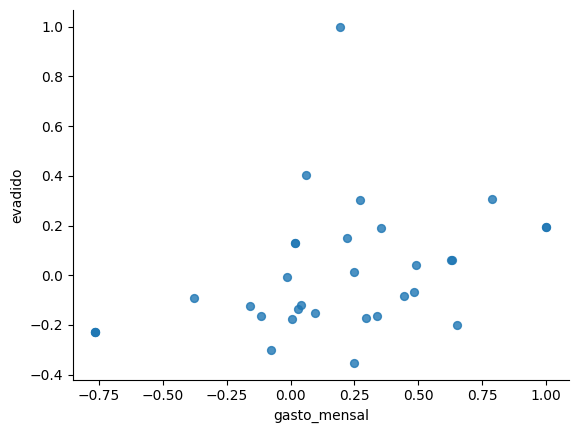

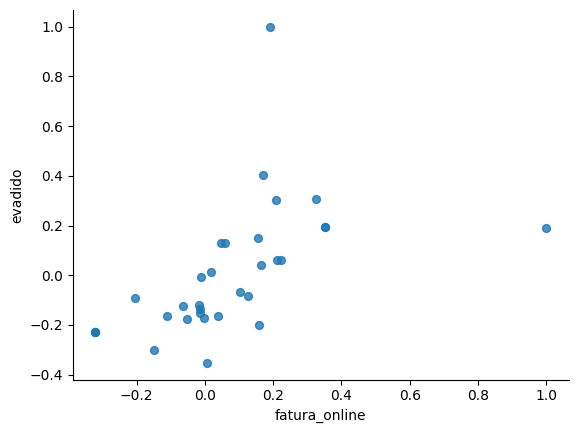

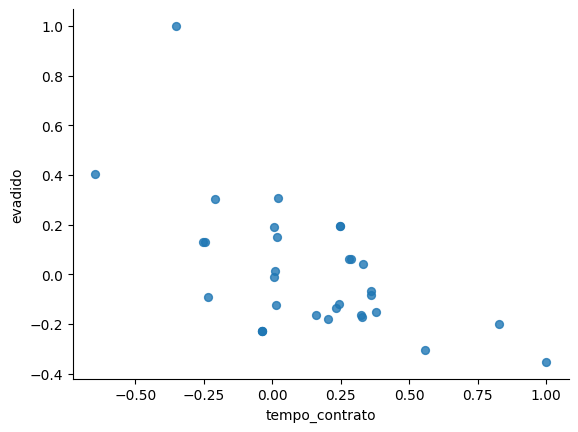

In [32]:
var = ['contrato_mes_a_mes','pag_cheque_eletronico','fibra_otica','gasto_mensal','fatura_online','tempo_contrato']

for col in var:
  analise_correlacao(col);
  plt.show()
  print('\n')

#🤖 Modelagem Preditiva

##Separação de Dados

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y_balanceado, test_size=0.3, stratify= y_balanceado, random_state=5)

##Criação de Modelos

###Árvore de decisão

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [36]:
arvore = DecisionTreeClassifier(max_depth=4, random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [37]:
arvore.predict(x_teste)

array([0., 0., 0., ..., 1., 1., 0.])

In [38]:
arvore.score(x_teste, y_teste)

0.8016103059581321

In [39]:
arvore.score(x_treino, y_treino)

0.8021538036725114

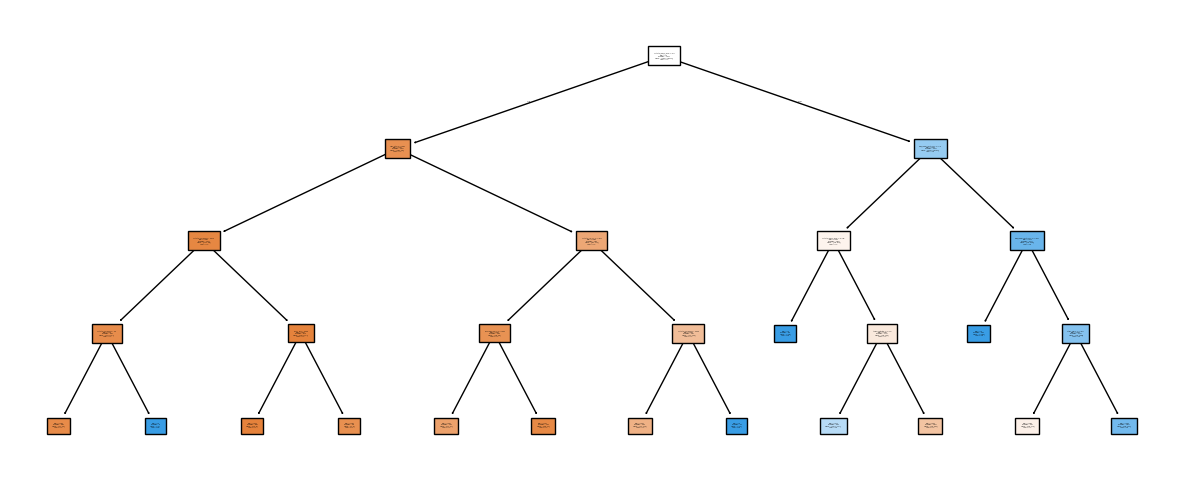

In [40]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);

###KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [43]:
knn.score(x_teste, y_teste)

0.7967793880837359

##Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
rf.fit(x_treino, y_treino)

RandomForestClassifier()

In [46]:
rf.score(x_teste, y_teste)

0.8673107890499195

##Escolhendo o melhor modelo

In [47]:
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste, y_teste)}')
print(f'Acurácia Random Forest: {rf.score(x_teste, y_teste)}')

Acurácia Árvore: 0.8016103059581321
Acurácia KNN: 0.7967793880837359
Acurácia Random Forest: 0.8673107890499195


###<font color='yellow'>Explicação da escolha do modelo e da normalização

Modelo escolhido: Random Forest.

Dentre os quatros modelos testados o que apresentou uma melhor acurácia de previsão foi o Random Forest, com uma taxa de acerto de 86%, o que mais se aproximou desse resulatado foi o de Árvore de Decisão, com uma taxa de acerto de 80%.

Os dados foram normalizados antes da criação do modelo, haja vista que tínhamos no DataFrame duas colunas numéricas com valores muito acima de 1. Então foi utilizado o MinMaxScaler para deixar todos os dados na mesma escala.

---

##Avaliação dos Modelos

In [48]:
from sklearn.model_selection import cross_validate, KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [49]:
#Árvore de decisão
scorrings = ['accuracy', 'recall', 'precision', 'f1']
modeloA = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultadosA = cross_validate(modeloA, x, y, cv=kf, scoring=scorrings)

In [50]:
#K N N
modeloK = KNeighborsClassifier()
cv_resultadosK = cross_validate(modeloK, x, y, cv=kf, scoring=scorrings)

In [51]:
#RandomForest
modeloR = RandomForestClassifier(max_depth=10)
cv_resultadosR = cross_validate(modeloR, x, y, cv=kf, scoring=scorrings)

In [52]:
def relatorio_metricas(resultados, model):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_padrao = resultados[metrica].std()
        print('\n')
        print(f'{metrica} para {model}')
        print(f'Intervalo de confiança: [{media - 2* desvio_padrao}, {min(media + 2* desvio_padrao, 1)}]')
        print(f'Média: {media}')
        print(f'Desvio padrão: {desvio_padrao}')

In [53]:
def matrix_confusao(model, modelo):
  model.fit(x, y)

  y_previsto = model.predict(x_teste)
  print(f'{modelo}')
  print(classification_report(y_teste, y_previsto))

  ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

Árvore de decisão
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      1552
         1.0       0.74      0.74      0.74      1553

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



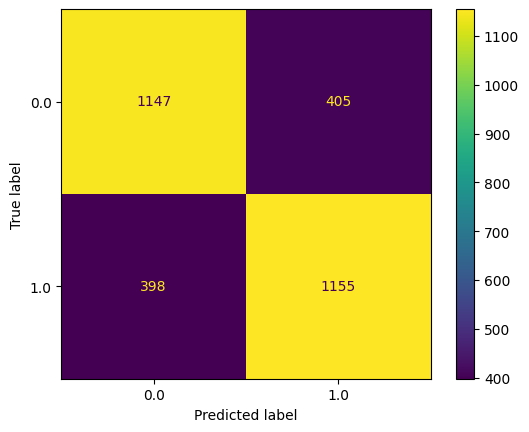

In [54]:
matrix_confusao(modeloA, 'Árvore de decisão')

In [55]:
relatorio_metricas(cv_resultadosA, 'Árvore de decisão')



test_accuracy para Árvore de decisão
Intervalo de confiança: [0.7513192661625445, 0.777292257161541]
Média: 0.7643057616620428
Desvio padrão: 0.0064932477497491375


test_recall para Árvore de decisão
Intervalo de confiança: [0.47568375800664253, 0.5678745815442378]
Média: 0.5217791697754401
Desvio padrão: 0.02304770588439882


test_precision para Árvore de decisão
Intervalo de confiança: [0.5348454720237245, 0.5846376867553137]
Média: 0.5597415793895191
Desvio padrão: 0.012448053682897328


test_f1 para Árvore de decisão
Intervalo de confiança: [0.5083965909719281, 0.5713695129231549]
Média: 0.5398830519475415
Desvio padrão: 0.015743230487806657


K N N
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      1552
         1.0       0.00      0.00      0.00      1553

    accuracy                           0.50      3105
   macro avg       0.25      0.50      0.33      3105
weighted avg       0.25      0.50      0.33      3105



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


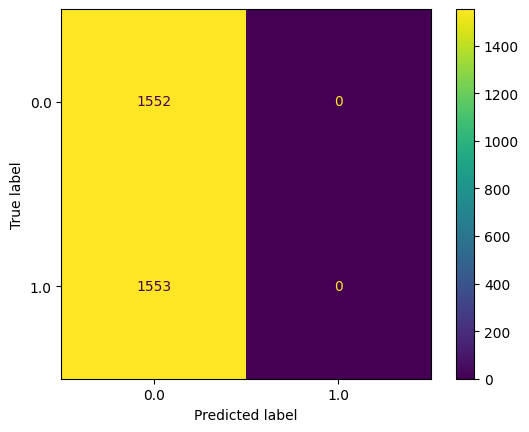

In [56]:
matrix_confusao(modeloK, 'K N N');

In [57]:
relatorio_metricas(cv_resultadosK, 'K N N')



test_accuracy para K N N
Intervalo de confiança: [0.7372113629047928, 0.7959486393534173]
Média: 0.7665800011291051
Desvio padrão: 0.014684319112156128


test_recall para K N N
Intervalo de confiança: [0.3788942876747978, 0.5159488395546041]
Média: 0.447421563614701
Desvio padrão: 0.034263637969951584


test_precision para K N N
Intervalo de confiança: [0.5139275748285326, 0.6419536725491737]
Média: 0.5779406236888531
Desvio padrão: 0.03200652443016027


test_f1 para K N N
Intervalo de confiança: [0.44325372080680475, 0.5645040620653587]
Média: 0.5038788914360818
Desvio padrão: 0.030312585314638513


RamdonForest
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75      1552
         1.0       0.74      0.79      0.77      1553

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



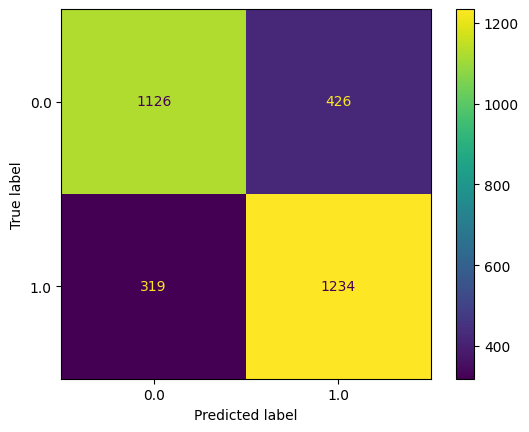

In [58]:
matrix_confusao(modeloR, 'RamdonForest');

In [59]:
relatorio_metricas(cv_resultadosR, 'RandomForest')



test_accuracy para RandomForest
Intervalo de confiança: [0.7771030232709124, 0.8230738026533408]
Média: 0.8000884129621266
Desvio padrão: 0.011492694845607105


test_recall para RandomForest
Intervalo de confiança: [0.46214364828407367, 0.5712383782079626]
Média: 0.5166910132460182
Desvio padrão: 0.02727368248097225


test_precision para RandomForest
Intervalo de confiança: [0.6285771142002998, 0.6864444945732033]
Média: 0.6575108043867516
Desvio padrão: 0.014466845093225884


test_f1 para RandomForest
Intervalo de confiança: [0.5421389959600014, 0.6142176221648261]
Média: 0.5781783090624137
Desvio padrão: 0.018019656551206197


#📋  Interpretação e Conclusões

##Análise de Importância das Variáveis

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


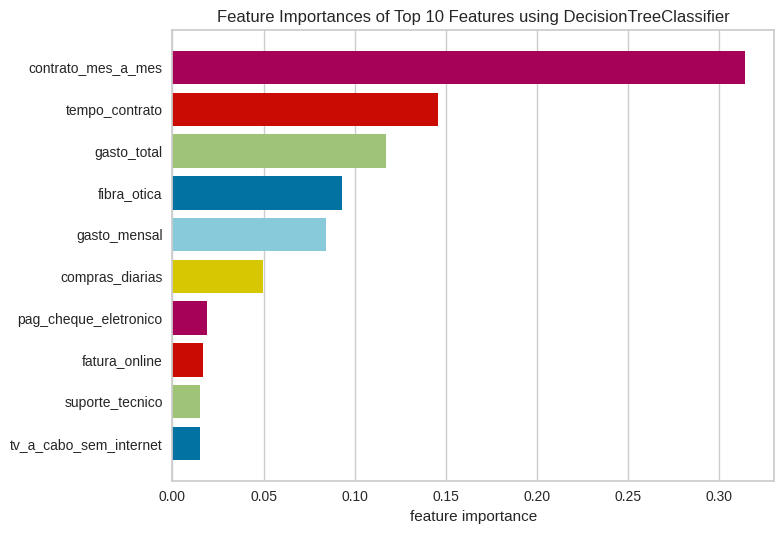

<Axes: title={'center': 'Feature Importances of Top 10 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [60]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(modeloA, relative=False, topn=10)
viz.fit(x_treino, y_treino)
viz.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


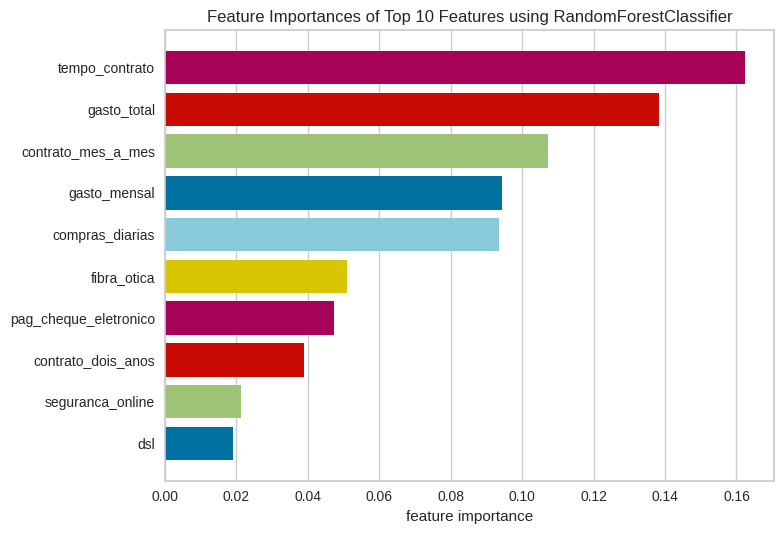

In [61]:
viz = FeatureImportances(modeloR, relative=False, topn=10)
viz.fit(x_treino, y_treino)
viz.show();

In [85]:
top_variaveis = ['tempo_contrato', 'gasto_total', 'contrato_mes_a_mes', 'compras_diarias','gasto_mensal','fibra_otica','pag_cheque_eletronico' ]

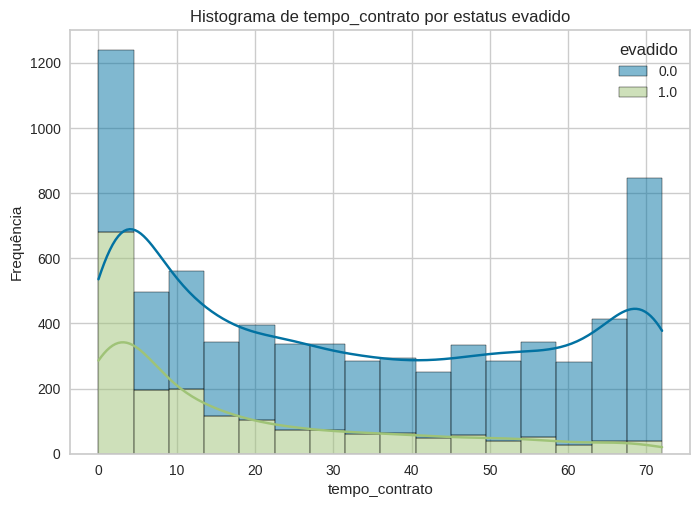

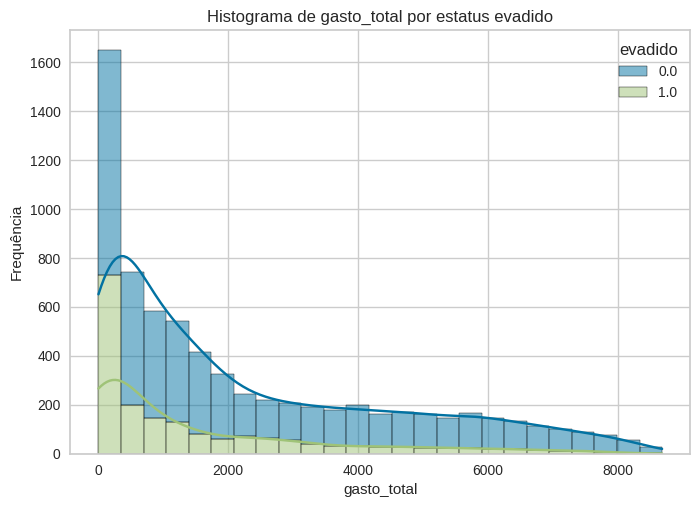

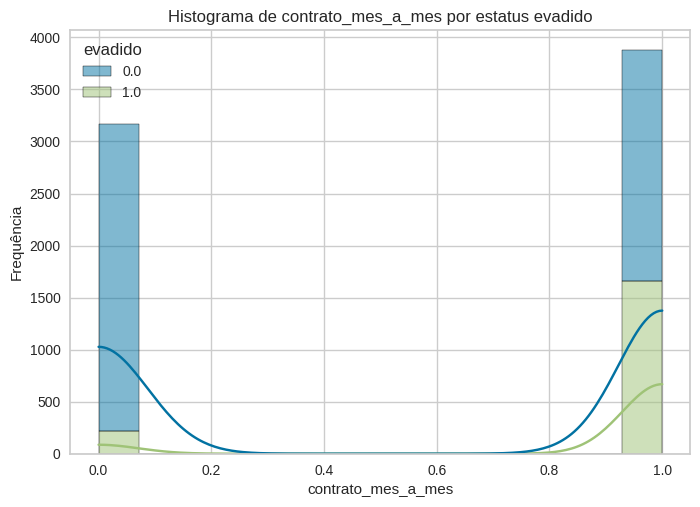

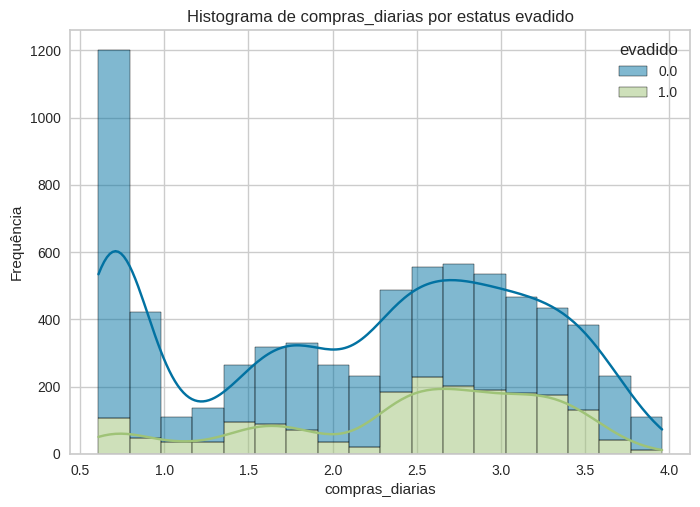

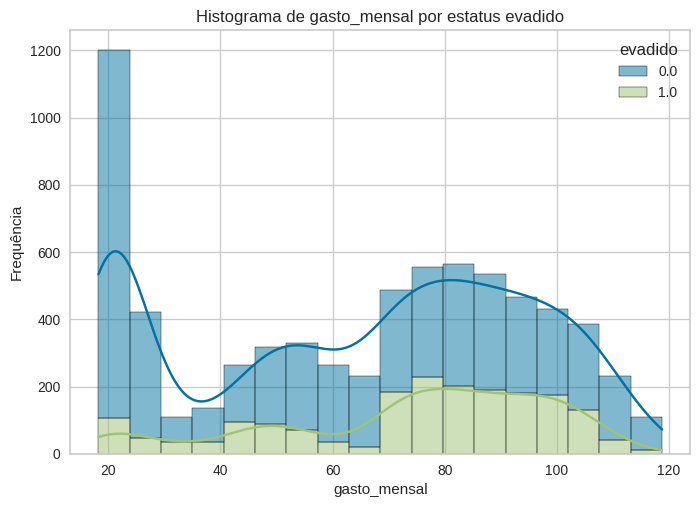

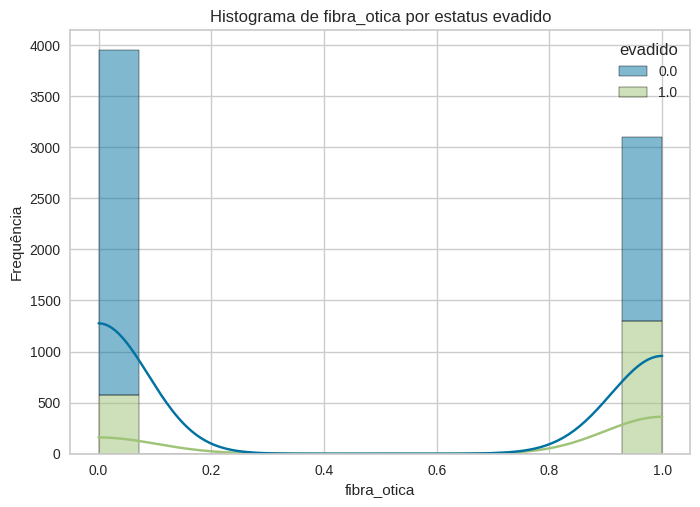

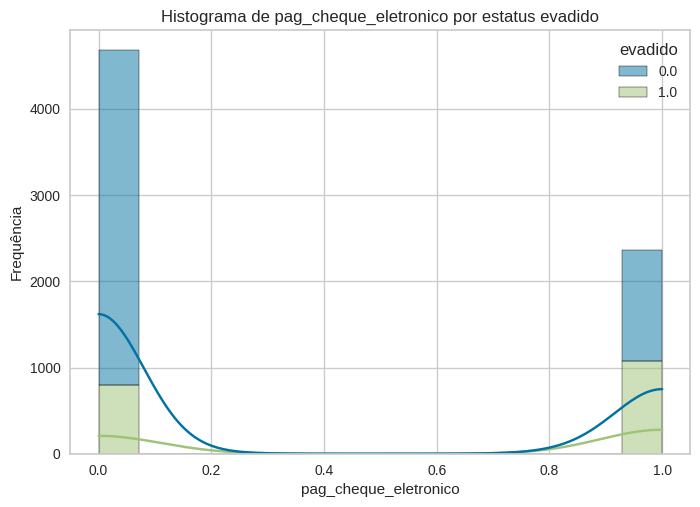

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
colum = 1
ymin = 0.0
ymax = 0.5

plt.figsize=(8,5)
for col in top_variaveis:
    sns.histplot(data=df_filtrado, x=col, hue='evadido', kde=True, multiple="stack")
    plt.title(f'Histograma de {col} por estatus evadido')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

##Conclusão

Principais observações e os fatores que estão mais relacionados à evasão de clientes com base na análise.

1. Distribuição de evadidos:
- A proporção de clientes que evadiram ('1') é de aproximadamente 26%.
- A proporção de clientes que não evadiram ('0') é de aproximadamente 71%.
- Existem 3% de valores desconhecidos ('2') na coluna evadido.

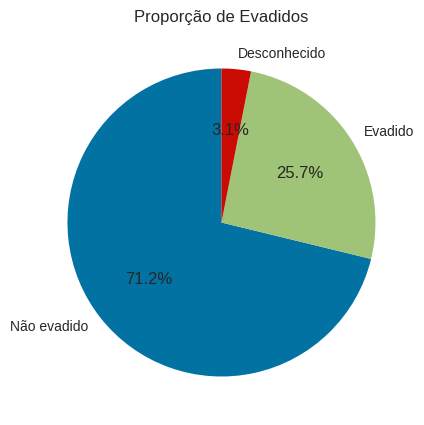

In [64]:
# @title Gráfico com as proporções
grafico_pizza(proporcao)

- Para fins de estudos dos dados os 3% de desconhecido foram retirados da base
- Os dados foram balaceados (oversample) para melhorar a ánalise pelos modelos a serem criados.

2. Análise das variáveis
- Tipo de Contrato: Clientes com contrato 'mês a mês' apresentam taxas de evasão significativamente mais altas.
- Serviço de Internet: Clientes com serviço 'fibra otica' tendem a ter maior evasão em comparação com 'dsl' ou sem serviço de internet.
- Método de Pagamento: 'cheque eletronico' é o método de pagamento associado à maior taxa de evasão.
- Serviços Adicionais (Segurança Online, Backup Online, Proteção dispositivo, Suporte Tecnico): A ausência desses serviços está associada
  a maiores taxas de evasão.
- Fatura online: Clientes com 'fatura_online' tendem a ter uma taxa de evasão ligeiramente maior.
- Gasto Mensal: Clientes que evadem geralmente têm 'gasto_mensal' mais altos.
- Tempo de contrato: Clientes com menor tempo de contrato têm maior probabilidade de evasão.
- Gasto Total: Clientes com 'gasto_total' mais baixos (que se relaciona com menor tempo de contrato) também tendem a evadir mais.

   Outras observações:
- A combinação de contrato 'month-to-month' e serviço de internet 'fiber optic' resulta em uma alta taxa de evasão.
- Clientes com contrato 'month-to-month' utilizando 'electronic check' como metodo de pagamento também exibem alta evasão.
- A ausência de segurança online para clientes com contrato 'month-to-month' está associada a uma evasão elevada.

3. Resumo dos Fatores Chave de Evasão:
- Contratos de curto prazo ('month-to-month').
- Serviços de internet de alta velocidade ('fiber optic').
- Utilização de métodos de pagamento 'electronic check'.
- Falta de serviços de segurança online e suporte técnico.
- Baixo tempo de relacionamento com a empresa ('tempo_contrato').
- Altos gastos mensais ('gasto_mensal').

### Principais conclusões da análise de dados

* Aproximadamente 26% dos clientes no conjunto de dados apresentaram rotatividade.
* Clientes com contratos mensais apresentam taxas de rotatividade significativamente maiores.
* Clientes com serviço de internet por fibra óptica têm maior probabilidade de rotatividade.
* Cheque eletrônico é o método de pagamento mais fortemente associado à rotatividade.
* A ausência de serviços como segurança online, backup online, proteção de dispositivos e suporte técnico está associada a taxas de rotatividade mais altas.
* Clientes com mensalidades mais altas tendem a rotatividade com mais frequência.
* Clientes com menor tempo de serviço têm maior probabilidade de rotatividade.
* A combinação de contratos mensais e serviço de internet por fibra óptica resulta em uma taxa de rotatividade particularmente alta.
* Clientes com contratos mensais que utilizam cheque eletrônico também apresentam alta rotatividade.
* A falta de segurança online para clientes com contratos mensais está fortemente associada à alta rotatividade.

### Insights ou Próximos Passos

* Concentre os esforços de retenção em clientes com contratos mensais, especialmente aqueles com internet de fibra óptica e que utilizam cheques eletrônicos.
* Promova a adoção de serviços adicionais, como segurança online e suporte técnico, principalmente para novos clientes ou aqueles com contratos de curto prazo.